In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('personality_dataset.csv')
df["Introversion_score"] = df["Personality"].map({"Extrovert": 0, "Introvert": 1})
s
#PILIH KOLOM & BERSIHKAN NaN
cols_needed = ["Time_spent_Alone", "Introversion_score"]
df_analysis = df[cols_needed].dropna()
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Introversion_score
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,1
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,0
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert,0


In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [59]:
X = df_analysis[["Time_spent_Alone"]].values
y = df_analysis["Introversion_score"].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, model.predict(X))

print("Slope: ", slope)
print("Intercept: ", intercept)
print(f"Equation  : ŷ = {intercept:.4f}  + {slope:.4f} * Time_spent_Alone")
print(f"R²        : {r2:.4f}\n")

Slope:  0.10349727559227002
Intercept:  0.02008964614170322
Equation  : ŷ = 0.0201  + 0.1035 * Time_spent_Alone
R²        : 0.5188



C:\Users\advan\AppData\Local\Temp\ipykernel_13972\1521744492.py:9: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\advan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


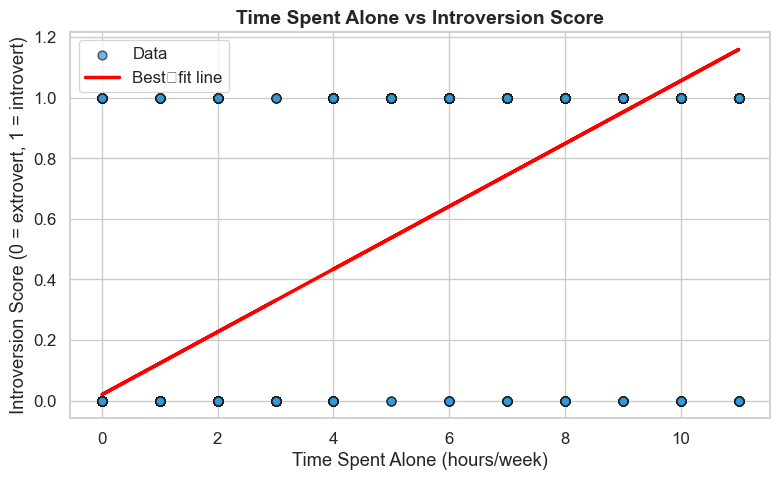

In [61]:
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="#3498db", s=40, edgecolor="k", alpha=0.7, label="Data")
plt.plot(X, model.predict(X), color="red", linewidth=2.5, label="Best‑fit line")
plt.title("Time Spent Alone vs Introversion Score", weight="bold", size=14)
plt.xlabel("Time Spent Alone (hours/week)")
plt.ylabel("Introversion Score (0 = extrovert, 1 = introvert)")
plt.legend(frameon=True)
plt.tight_layout()
plt.show()

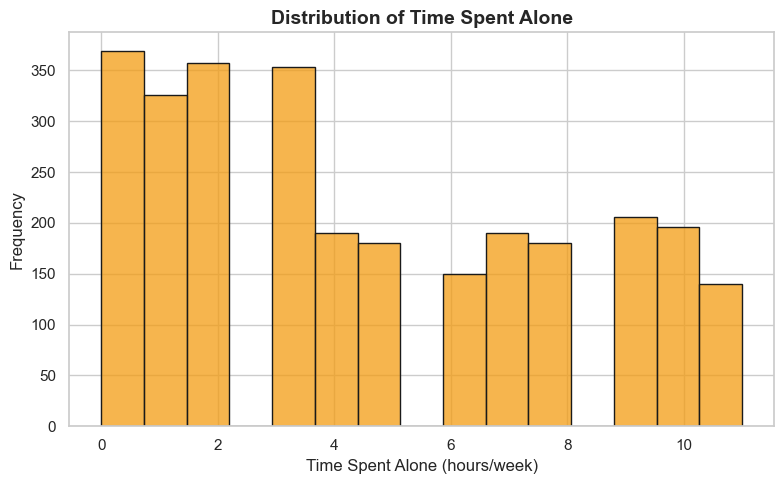

In [71]:
plt.figure(figsize=(8, 5))
sns.histplot(df_analysis["Time_spent_Alone"],
             bins=15, color="#F39C12", edgecolor="k")
plt.title("Distribution of Time Spent Alone", weight="bold", size=14)
plt.xlabel("Time Spent Alone (hours/week)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()